In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
import string


In [2]:
data=pd.read_csv("D:/softwares/deployement/netflix-tiles-master/netflix_titles.csv")

In [3]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
data.describe()


,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [7]:
data.describe(include="all")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s5961,Movie,Garfield Gets Real,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


<AxesSubplot:>

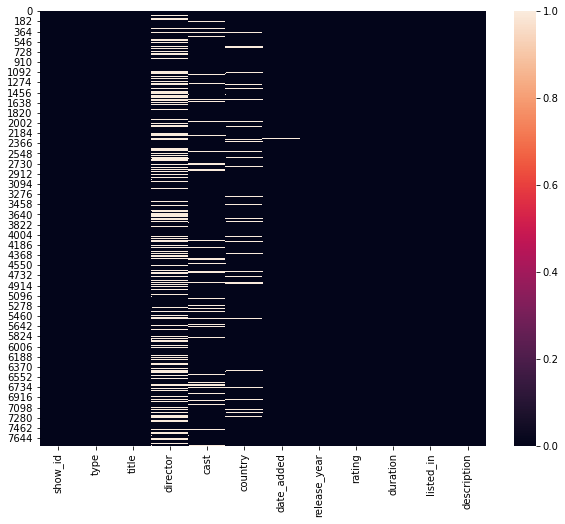

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(data.isnull())

In [9]:
data.country.mode()

0    United States
dtype: object

In [10]:
data["country"]=data["country"].fillna("United States")

In [11]:
data["director"]=data.director.fillna("")


In [12]:
new_data=data.dropna()

In [13]:
data.shape

(7787, 12)

In [14]:
new_data.shape

(7052, 12)

In [15]:
new_data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [16]:
new_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [17]:
new_data.director

0                        
1       Jorge Michel Grau
2            Gilbert Chan
3             Shane Acker
4          Robert Luketic
              ...        
7781         Peter Hewitt
7782          Josef Fares
7783          Mozez Singh
7784                     
7785                     
Name: director, Length: 7052, dtype: object

In [18]:
new_data.rating.value_counts()

TV-MA       2577
TV-14       1755
TV-PG        674
R            657
PG-13        378
TV-Y7        251
TV-Y         244
PG           241
TV-G         159
NR            66
G             38
UR             5
TV-Y7-FV       4
NC-17          3
Name: rating, dtype: int64

In [19]:
new_data["rating"]=new_data["rating"].map({"TV-MA":"Adults","TV-14":"Teens","TV-PG":"Older Kids","R":"Adults","PG-13":"Teens","TV-Y7":"Older Kids","TV-Y":"Kids","PG":"Older Kids","TV-G":"Kids","NR":"Adults","G":"Kids","UR":"Adults","TV-Y7-FV":"Older Kids","NC-17":"Adults"})

<ipython-input-19-e50ba8aec3a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["rating"]=new_data["rating"].map({"TV-MA":"Adults","TV-14":"Teens","TV-PG":"Older Kids","R":"Adults","PG-13":"Teens","TV-Y7":"Older Kids","TV-Y":"Kids","PG":"Older Kids","TV-G":"Kids","NR":"Adults","G":"Kids","UR":"Adults","TV-Y7-FV":"Older Kids","NC-17":"Adults"})


In [20]:
new_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,Adults,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,Adults,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,Adults,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,Teens,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,Teens,123 min,Dramas,A brilliant group of students become card-coun...


D:\softwares\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

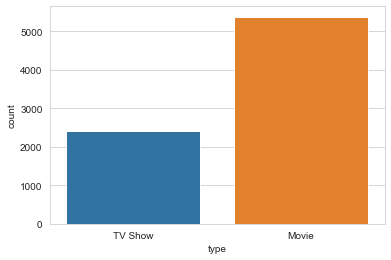

In [21]:
sns.set_style("whitegrid")
sns.countplot("type",data=data)

In [22]:
month=[]
for row in new_data["date_added"]:
    month.append(row.split()[0])

new_data["data_added_month"]=month

<ipython-input-22-ea07b678211c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["data_added_month"]=month


In [23]:
date=[]
for row in new_data["date_added"]:
    date.append(row.split()[1].split(",")[0])
    
new_data["date_added_date"]=date

<ipython-input-23-6e9d62d018b2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["date_added_date"]=date


In [24]:
year=[]
for row in new_data["date_added"]:
    year.append(row.split()[2])
    
new_data["date_added_year"]=year

<ipython-input-24-9b61b8b9bb87>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["date_added_year"]=year


In [25]:
new_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,data_added_month,date_added_date,date_added_year
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,Adults,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,14,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,Adults,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,23,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,Adults,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,20,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,Teens,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,16,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,Teens,123 min,Dramas,A brilliant group of students become card-coun...,January,1,2020


In [26]:
new_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'data_added_month', 'date_added_date', 'date_added_year'],
      dtype='object')

In [27]:
new_data.drop(["show_id","date_added"],axis=1,inplace=True)

D:\softwares\anaconda\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [28]:
new_data.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,data_added_month,date_added_date,date_added_year
0,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adults,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,14,2020
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,23,2016
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adults,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,20,2018
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teens,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,16,2017
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teens,123 min,Dramas,A brilliant group of students become card-coun...,January,1,2020


In [29]:
new_data.dtypes

type                object
title               object
director            object
cast                object
country             object
release_year         int64
rating              object
duration            object
listed_in           object
description         object
data_added_month    object
date_added_date     object
date_added_year     object
dtype: object

In [30]:
new_data["release_year"]=new_data.release_year.astype("string")

<ipython-input-30-4d037173d02b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["release_year"]=new_data.release_year.astype("string")


In [31]:
new_data.dtypes

type                object
title               object
director            object
cast                object
country             object
release_year        string
rating              object
duration            object
listed_in           object
description         object
data_added_month    object
date_added_date     object
date_added_year     object
dtype: object

In [32]:
new_data.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,data_added_month,date_added_date,date_added_year
0,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adults,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,14,2020
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,23,2016
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adults,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,20,2018
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teens,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,16,2017
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teens,123 min,Dramas,A brilliant group of students become card-coun...,January,1,2020


In [33]:
feature=new_data[["type","title","director","cast","country","rating","listed_in","description"]]

In [34]:
feature.head()

,type,title,director,cast,country,rating,listed_in,description
0,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,Adults,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,Adults,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,Adults,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,Teens,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,Teens,Dramas,A brilliant group of students become card-coun...


<AxesSubplot:>

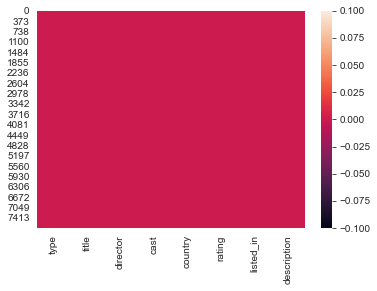

In [35]:
sns.heatmap(feature.isnull())

In [36]:
feature_data=feature["type"]+" "+feature["director"]+" "+feature["cast"]+" "+feature["country"]+" "+feature["rating"]+" "+feature["listed_in"]+" "+feature["description"]

In [37]:
feature["feature_data"]=feature_data

<ipython-input-37-d3e2b4c3c112>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature["feature_data"]=feature_data


In [38]:
feature.head()

,type,title,director,cast,country,rating,listed_in,description,feature_data
0,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,Adults,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,"TV Show João Miguel, Bianca Comparato, Michel..."
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,Adults,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,"Movie Jorge Michel Grau Demián Bichir, Héctor ..."
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,Adults,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...","Movie Gilbert Chan Tedd Chan, Stella Chung, He..."
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,Teens,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...","Movie Shane Acker Elijah Wood, John C. Reilly,..."
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,Teens,Dramas,A brilliant group of students become card-coun...,"Movie Robert Luketic Jim Sturgess, Kevin Space..."


In [39]:
df=feature["feature_data"]

In [40]:
df.head()

0    TV Show  João Miguel, Bianca Comparato, Michel...
1    Movie Jorge Michel Grau Demián Bichir, Héctor ...
2    Movie Gilbert Chan Tedd Chan, Stella Chung, He...
3    Movie Shane Acker Elijah Wood, John C. Reilly,...
4    Movie Robert Luketic Jim Sturgess, Kevin Space...
Name: feature_data, dtype: object

In [41]:
from nltk.tokenize import word_tokenize

In [42]:
word=[]
for row in df:
    words=word_tokenize(row)
    word.append(words)

In [43]:
feature["word_tokenize"]=word

<ipython-input-43-1d0f77eba1d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature["word_tokenize"]=word


In [44]:
feature.head()

,type,title,director,cast,country,rating,listed_in,description,feature_data,word_tokenize
0,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,Adults,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,"TV Show João Miguel, Bianca Comparato, Michel...","[TV, Show, João, Miguel, ,, Bianca, Comparato,..."
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,Adults,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,"Movie Jorge Michel Grau Demián Bichir, Héctor ...","[Movie, Jorge, Michel, Grau, Demián, Bichir, ,..."
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,Adults,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...","Movie Gilbert Chan Tedd Chan, Stella Chung, He...","[Movie, Gilbert, Chan, Tedd, Chan, ,, Stella, ..."
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,Teens,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...","Movie Shane Acker Elijah Wood, John C. Reilly,...","[Movie, Shane, Acker, Elijah, Wood, ,, John, C..."
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,Teens,Dramas,A brilliant group of students become card-coun...,"Movie Robert Luketic Jim Sturgess, Kevin Space...","[Movie, Robert, Luketic, Jim, Sturgess, ,, Kev..."


In [45]:
from nltk.corpus import stopwords


In [46]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [47]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [48]:
def text_processing(row):
    non_punc= [word.lower() for word in row if word not in string.punctuation]
    non_punc=[word for word in non_punc if word not in stopwords.words("english")]
    return " ".join(non_punc)


In [49]:
feature["clean_data"]=feature["word_tokenize"].apply(text_processing)


<ipython-input-49-a69848b0af68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature["clean_data"]=feature["word_tokenize"].apply(text_processing)


In [50]:
feature.head()

,type,title,director,cast,country,rating,listed_in,description,feature_data,word_tokenize,clean_data
0,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,Adults,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,"TV Show João Miguel, Bianca Comparato, Michel...","[TV, Show, João, Miguel, ,, Bianca, Comparato,...",tv show joão miguel bianca comparato michel go...
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,Adults,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,"Movie Jorge Michel Grau Demián Bichir, Héctor ...","[Movie, Jorge, Michel, Grau, Demián, Bichir, ,...",movie jorge michel grau demián bichir héctor b...
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,Adults,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...","Movie Gilbert Chan Tedd Chan, Stella Chung, He...","[Movie, Gilbert, Chan, Tedd, Chan, ,, Stella, ...",movie gilbert chan tedd chan stella chung henl...
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,Teens,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...","Movie Shane Acker Elijah Wood, John C. Reilly,...","[Movie, Shane, Acker, Elijah, Wood, ,, John, C...",movie shane acker elijah wood john c. reilly j...
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,Teens,Dramas,A brilliant group of students become card-coun...,"Movie Robert Luketic Jim Sturgess, Kevin Space...","[Movie, Robert, Luketic, Jim, Sturgess, ,, Kev...",movie robert luketic jim sturgess kevin spacey...


In [51]:
feature.insert(0,"index",feature.index)

In [52]:
feature.head()

,index,type,title,director,cast,country,rating,listed_in,description,feature_data,word_tokenize,clean_data
0,0,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,Adults,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,"TV Show João Miguel, Bianca Comparato, Michel...","[TV, Show, João, Miguel, ,, Bianca, Comparato,...",tv show joão miguel bianca comparato michel go...
1,1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,Adults,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,"Movie Jorge Michel Grau Demián Bichir, Héctor ...","[Movie, Jorge, Michel, Grau, Demián, Bichir, ,...",movie jorge michel grau demián bichir héctor b...
2,2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,Adults,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...","Movie Gilbert Chan Tedd Chan, Stella Chung, He...","[Movie, Gilbert, Chan, Tedd, Chan, ,, Stella, ...",movie gilbert chan tedd chan stella chung henl...
3,3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,Teens,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...","Movie Shane Acker Elijah Wood, John C. Reilly,...","[Movie, Shane, Acker, Elijah, Wood, ,, John, C...",movie shane acker elijah wood john c. reilly j...
4,4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,Teens,Dramas,A brilliant group of students become card-coun...,"Movie Robert Luketic Jim Sturgess, Kevin Space...","[Movie, Robert, Luketic, Jim, Sturgess, ,, Kev...",movie robert luketic jim sturgess kevin spacey...


In [53]:
feature.clean_data[0]

'tv show joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi brazil adults international tv shows tv dramas tv sci-fi fantasy future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

In [54]:
model=CountVectorizer()

In [55]:
count_matrix=model.fit_transform(feature["clean_data"])

In [56]:
cosine_sim=cosine_similarity(count_matrix)

In [57]:
def get_title(index):
    return feature[feature.index==index]["title"].values[0]
def get_index(title):
    return feature[feature.title==title]["index"].values[0]

In [58]:
import pickle

In [59]:
pickle.dump(model,open("netflix_count_vectorizer.pkl","wb"))

In [60]:
show_user_likes="21"
show_index=get_index(show_user_likes)
similar_shows=list(enumerate(cosine_sim[show_index]))

In [61]:
similar_shows

[(0, 0.018480531773864325),
 (1, 0.04564354645876385),
 (2, 0.042562826537937436),
 (3, 0.10758287072798382),
 (4, 1.0000000000000007),
 (5, 0.018791150700070727),
 (6, 0.021516574145596764),
 (7, 0.1276884796138123),
 (8, 0.0440225453162812),
 (9, 0.04351941398892446),
 (10, 0.09491579957524991),
 (11, 0.06900655593423544),
 (12, 0.024397501823713332),
 (13, 0.0912870929175277),
 (14, 0.05544159532159297),
 (15, 0.07161148740394331),
 (16, 0.0880450906325624),
 (17, 0.0652791209833867),
 (18, 0.0545544725589981),
 (19, 0.06762522260005743),
 (20, 0.06846531968814579),
 (21, 0.06846531968814579),
 (22, 0.07118684968143743),
 (23, 0.021281413268968718),
 (24, 0.048112522432468816),
 (25, 0.10050378152592122),
 (26, 0.04564354645876385),
 (27, 0.04351941398892446),
 (28, 0.0440225453162812),
 (29, 0.1041666666666667),
 (30, 0.047457899787624956),
 (31, 0.07024393586862707),
 (32, 0.06762522260005743),
 (33, 0.06250000000000001),
 (34, 0.021053798026662976),
 (35, 0.04123930494211613),
 (

In [62]:
sorted_similar_shows=sorted(similar_shows,key=lambda x:x[1],reverse=True)[1:]

In [63]:
sorted_similar_shows

[(1850, 0.19364916731037088),
 (5360, 0.18750000000000006),
 (2567, 0.18480531773864325),
 (2793, 0.18146654657782446),
 (215, 0.1803339269334865),
 (643, 0.1760901812651248),
 (5586, 0.1751622624363427),
 (410, 0.17407765595569785),
 (3237, 0.17407765595569782),
 (6171, 0.1721325931647741),
 (3824, 0.17206180040292135),
 (269, 0.17025130615174974),
 (3052, 0.1684303842133038),
 (6102, 0.1684303842133038),
 (1075, 0.16839382851364088),
 (4259, 0.1666666666666667),
 (5751, 0.1666666666666667),
 (6180, 0.1666666666666667),
 (3865, 0.16495721976846453),
 (735, 0.16390251702679645),
 (1097, 0.16390251702679645),
 (4901, 0.1636634176769943),
 (1679, 0.1632993161855452),
 (6916, 0.1632993161855452),
 (5372, 0.16137430609197573),
 (6842, 0.16137430609197573),
 (2703, 0.16081688022566923),
 (2860, 0.16081688022566923),
 (6671, 0.16081688022566923),
 (3964, 0.16012815380508716),
 (2099, 0.15811388300841897),
 (2857, 0.15811388300841897),
 (537, 0.15779218606680068),
 (2947, 0.15713484026367724)

In [64]:
i=0
print(f"Top 5 similar shows {show_user_likes} are :")
for element in sorted_similar_shows:
    print(get_title(element[0]))
    i=i+1
    if i>5:
        break

Top 5 similar shows 21 are :
Dragonheart 3: The Sorcerer
Sam Kinison: The Scream Continues
H2O: Just Add Water
Honey 2
A Perfect Man
Axone


In [65]:
feature[feature["title"]=="Hairspray"]


,index,type,title,director,cast,country,rating,listed_in,description,feature_data,word_tokenize,clean_data
2578,2578,Movie,Hairspray,Adam Shankman,"Nikki Blonsky, John Travolta, Michelle Pfeiffe...","United States, United Kingdom, Canada",Older Kids,"Children & Family Movies, Comedies, Music & Mu...","In 1962, ambitious plus-size teen Tracy Turnbl...","Movie Adam Shankman Nikki Blonsky, John Travol...","[Movie, Adam, Shankman, Nikki, Blonsky, ,, Joh...",movie adam shankman nikki blonsky john travolt...


In [66]:
feature[feature["title"]=="Sugar High"]


,index,type,title,director,cast,country,rating,listed_in,description,feature_data,word_tokenize,clean_data
5872,5872,Movie,Sugar High,Ariel Boles,Hunter March,United States,Kids,Children & Family Movies,"Talented sugar artists compete for $10,000 ove...",Movie Ariel Boles Hunter March United States K...,"[Movie, Ariel, Boles, Hunter, March, United, S...",movie ariel boles hunter march united states k...


In [67]:
feature[feature["title"]=="Giving Voice"]


,index,type,title,director,cast,country,rating,listed_in,description,feature_data,word_tokenize,clean_data
2434,2434,Movie,Giving Voice,"James D. Stern, Fernando Villena","Viola Davis, Denzel Washington, Stephen Hender...",United States,Teens,Documentaries,Six ambitious student actors audition for the ...,"Movie James D. Stern, Fernando Villena Viola D...","[Movie, James, D., Stern, ,, Fernando, Villena...",movie james d. stern fernando villena viola da...


In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer 

In [69]:
model1=TfidfVectorizer(use_idf = True,lowercase = True, strip_accents='ascii',stop_words=set(stopwords.words("english")))

In [70]:
vectorizer=model1.fit_transform(feature["clean_data"])

In [71]:
cosine_similarity=cosine_similarity(vectorizer)

In [72]:
show_user_likes="21"
show_index=get_index(show_user_likes)
similar_shows=list(enumerate(cosine_sim[show_index]))

In [73]:
similar_shows

[(0, 0.018480531773864325),
 (1, 0.04564354645876385),
 (2, 0.042562826537937436),
 (3, 0.10758287072798382),
 (4, 1.0000000000000007),
 (5, 0.018791150700070727),
 (6, 0.021516574145596764),
 (7, 0.1276884796138123),
 (8, 0.0440225453162812),
 (9, 0.04351941398892446),
 (10, 0.09491579957524991),
 (11, 0.06900655593423544),
 (12, 0.024397501823713332),
 (13, 0.0912870929175277),
 (14, 0.05544159532159297),
 (15, 0.07161148740394331),
 (16, 0.0880450906325624),
 (17, 0.0652791209833867),
 (18, 0.0545544725589981),
 (19, 0.06762522260005743),
 (20, 0.06846531968814579),
 (21, 0.06846531968814579),
 (22, 0.07118684968143743),
 (23, 0.021281413268968718),
 (24, 0.048112522432468816),
 (25, 0.10050378152592122),
 (26, 0.04564354645876385),
 (27, 0.04351941398892446),
 (28, 0.0440225453162812),
 (29, 0.1041666666666667),
 (30, 0.047457899787624956),
 (31, 0.07024393586862707),
 (32, 0.06762522260005743),
 (33, 0.06250000000000001),
 (34, 0.021053798026662976),
 (35, 0.04123930494211613),
 (

In [74]:
sorted_similar_shows=sorted(similar_shows,key=lambda x:x[1],reverse=True)[1:]

In [75]:
sorted_similar_shows

[(1850, 0.19364916731037088),
 (5360, 0.18750000000000006),
 (2567, 0.18480531773864325),
 (2793, 0.18146654657782446),
 (215, 0.1803339269334865),
 (643, 0.1760901812651248),
 (5586, 0.1751622624363427),
 (410, 0.17407765595569785),
 (3237, 0.17407765595569782),
 (6171, 0.1721325931647741),
 (3824, 0.17206180040292135),
 (269, 0.17025130615174974),
 (3052, 0.1684303842133038),
 (6102, 0.1684303842133038),
 (1075, 0.16839382851364088),
 (4259, 0.1666666666666667),
 (5751, 0.1666666666666667),
 (6180, 0.1666666666666667),
 (3865, 0.16495721976846453),
 (735, 0.16390251702679645),
 (1097, 0.16390251702679645),
 (4901, 0.1636634176769943),
 (1679, 0.1632993161855452),
 (6916, 0.1632993161855452),
 (5372, 0.16137430609197573),
 (6842, 0.16137430609197573),
 (2703, 0.16081688022566923),
 (2860, 0.16081688022566923),
 (6671, 0.16081688022566923),
 (3964, 0.16012815380508716),
 (2099, 0.15811388300841897),
 (2857, 0.15811388300841897),
 (537, 0.15779218606680068),
 (2947, 0.15713484026367724)

In [76]:
i=0
print(f"Top 5 similar shows {show_user_likes} are :")
for element in sorted_similar_shows:
    print(get_title(element[0]))
    i=i+1
    if i>5:
        break

Top 5 similar shows 21 are :
Dragonheart 3: The Sorcerer
Sam Kinison: The Scream Continues
H2O: Just Add Water
Honey 2
A Perfect Man
Axone


In [77]:
feature.head()

,index,type,title,director,cast,country,rating,listed_in,description,feature_data,word_tokenize,clean_data
0,0,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,Adults,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,"TV Show João Miguel, Bianca Comparato, Michel...","[TV, Show, João, Miguel, ,, Bianca, Comparato,...",tv show joão miguel bianca comparato michel go...
1,1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,Adults,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,"Movie Jorge Michel Grau Demián Bichir, Héctor ...","[Movie, Jorge, Michel, Grau, Demián, Bichir, ,...",movie jorge michel grau demián bichir héctor b...
2,2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,Adults,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...","Movie Gilbert Chan Tedd Chan, Stella Chung, He...","[Movie, Gilbert, Chan, Tedd, Chan, ,, Stella, ...",movie gilbert chan tedd chan stella chung henl...
3,3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,Teens,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...","Movie Shane Acker Elijah Wood, John C. Reilly,...","[Movie, Shane, Acker, Elijah, Wood, ,, John, C...",movie shane acker elijah wood john c. reilly j...
4,4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,Teens,Dramas,A brilliant group of students become card-coun...,"Movie Robert Luketic Jim Sturgess, Kevin Space...","[Movie, Robert, Luketic, Jim, Sturgess, ,, Kev...",movie robert luketic jim sturgess kevin spacey...


In [78]:
feature.columns

Index(['index', 'type', 'title', 'director', 'cast', 'country', 'rating',
       'listed_in', 'description', 'feature_data', 'word_tokenize',
       'clean_data'],
      dtype='object')

In [79]:
new=feature[["index","type","title","director","cast","rating","listed_in","description","clean_data"]]

In [80]:
new.head()

,index,type,title,director,cast,rating,listed_in,description,clean_data
0,0,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Adults,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,tv show joão miguel bianca comparato michel go...
1,1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Adults,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,movie jorge michel grau demián bichir héctor b...
2,2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Adults,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",movie gilbert chan tedd chan stella chung henl...
3,3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",Teens,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",movie shane acker elijah wood john c. reilly j...
4,4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",Teens,Dramas,A brilliant group of students become card-coun...,movie robert luketic jim sturgess kevin spacey...


In [81]:
new.to_csv("main.csv",index=False)

In [82]:
s=pd.read_csv("main.csv")

In [83]:
s.head()

,index,type,title,director,cast,rating,listed_in,description,clean_data
0,0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Adults,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,tv show joão miguel bianca comparato michel go...
1,1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Adults,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,movie jorge michel grau demián bichir héctor b...
2,2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Adults,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",movie gilbert chan tedd chan stella chung henl...
3,3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",Teens,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",movie shane acker elijah wood john c. reilly j...
4,4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",Teens,Dramas,A brilliant group of students become card-coun...,movie robert luketic jim sturgess kevin spacey...
